# <font color='blue'>Séries Temporais</font>
<p> Séries Temporais nada mais é do que uma série de ponto de dados ordenados no decorrer do tempo. Em uma série temporal, o tempo costuma ser a variável independente e a meta geralmente é fazer uma previsão para o futuro.<br>

### Exemplos de campos de uso
<p>
Economia: Produto Interno Bruto (PIB), Índice de Preços ao Consumidor (IPC), Índice S&P 500 e taxas de desemprego<br>
Ciências Sociais: Taxas de natalidade, população, dados de migração, indicadores políticos<br>
Epidemiologia: Taxas de doenças, taxas de mortalidade, populações de mosquitos<br>
Medicina:Controle de pressão arterial, controle de peso, medições de colesterol, monitoramento de frequência cardíaca<br>
Física:	Temperaturas globais, observações mensais de manchas solares, níveis de poluição.    
    
# <font color='blue'>Monte Carlo</font>
<p> As simulações de Monte Carlo têm o nome do hot spot de apostas em Mônaco, pois o
acaso e os resultados aleatórios são centrais na técnica de modelagem, assim como em jogos
como roleta, dados e caça-níqueis. A técnica foi desenvolvida pela primeira vez por Stanislaw
Ulam, um matemático que trabalhou no Projeto Manhattan. Após a guerra, enquanto se
recuperava de uma cirurgia no cérebro, Ulam se divertiu jogando inúmeros jogos de paciência.
Ele ficou interessado em traçar o resultado de cada um desses jogos, a fim de observar sua
distribuição e determinar a probabilidade de vitória. Depois que ele compartilhou sua ideia com
John Von Neumann, os dois colaboraram para desenvolver a simulação de Monte Carlo
    
### Exemplos de campos de uso
As telecomunicações as utilizam para avaliar o desempenho da rede em
diferentes cenários, ajudando-os a otimizar a rede.<br>
Os analistas os utilizam para avaliar o risco de uma entidade adiar e analisar derivativos, ou outros produtos financeiros.<br> Seguradoras e perfuradores de poços de petróleo também os utilizam.<br>
As simulações de Monte Carlo têm inúmeras aplicações fora dos negócios e das finanças, como meteorologia, astronomia e física
de partículas    

### Estudo de Caso - Simulação de Monte Carlo e Séries Temporais Para Modelagem Financeira

### Carregando os Pacotes

In [ ]:
#importando a biblioteca do YahooFinance para baixar cotações
#Caso não tenha instalado ainda esse pacote, basta digitar !pip3 install yfinance
import yfinance as yF

# Imports para manipulação de dados
import numpy as np
import pandas as pd

# Imports para visualização
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns

# Imports para cálculos estatísticos
import scipy
#from scipy.stats import kurtosis, skew, shapiro
import warnings
warnings.filterwarnings("ignore")

# Imports para formatação dos gráficos
plt.style.use('fivethirtyeight')
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10


#formatando valores com duas casas decimais
pd.options.display.float_format = '{:.2f}'.format

### Carregando os Dados

In [ ]:
# Carrega o dataset
#dados = pd.read_csv("dados.csv", parse_dates = True, index_col = "Data")

Cotacoes = yF.Ticker("BTC-USD")

# Opções de períodos 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y e ytd.
dados = Cotacoes.history(period="1y")
dados.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-04-19 00:00:00+00:00,30394.19,30411.05,28669.90,28822.68,24571565421,0.00,0.00
2023-04-20 00:00:00+00:00,28823.68,29076.40,28037.26,28245.99,21340360360,0.00,0.00
2023-04-21 00:00:00+00:00,28249.23,28349.97,27177.37,27276.91,20759504330,0.00,0.00
2023-04-22 00:00:00+00:00,27265.89,27872.14,27169.57,27817.50,13125734602,0.00,0.00
2023-04-23 00:00:00+00:00,27816.14,27820.24,27400.31,27591.38,12785446832,0.00,0.00


In [ ]:
dados.drop('Dividends', axis=1, inplace=True)
dados.drop('Stock Splits', axis=1, inplace=True)
dados.columns = ['Abertura','Maximo','Minimo','Fechamento','Volume']
dados.head()

,Abertura,Maximo,Minimo,Fechamento,Volume
Date,,,,,
2023-04-19 00:00:00+00:00,30394.19,30411.05,28669.90,28822.68,24571565421
2023-04-20 00:00:00+00:00,28823.68,29076.40,28037.26,28245.99,21340360360
2023-04-21 00:00:00+00:00,28249.23,28349.97,27177.37,27276.91,20759504330
2023-04-22 00:00:00+00:00,27265.89,27872.14,27169.57,27817.50,13125734602
2023-04-23 00:00:00+00:00,27816.14,27820.24,27400.31,27591.38,12785446832


In [ ]:
# Vamos observar o nosso range de dados
print('Menor data: ', dados.index.min())
print('Maior data:', dados.index.max())

Menor data:  2023-04-19 00:00:00+00:00
Maior data: 2024-04-19 00:00:00+00:00


In [ ]:
# Vamos observar os dados referente a ultima data do nosso conjunto de dados
# Utilizaremos esses dados mais adiante para compor os parametros a simulação de Monte Carlo
display(dados.loc[dados.index.max()])

Abertura           63509.77
Maximo             63509.77
Minimo             59698.51
Fechamento         61538.25
Volume       41800290304.00
Name: 2024-04-19 00:00:00+00:00, dtype: float64

In [ ]:
# Calculando o percentual de mudança na cotação de fechamento diário das ações
# Ou seja, quanto o valor de fechamento varia de um dia para outro, o retorno diário da ação
retorno_diario = dados["Fechamento"].pct_change().dropna()
retorno_diario.head

<bound method NDFrame.head of Date
2023-04-20 00:00:00+00:00   -0.02
2023-04-21 00:00:00+00:00   -0.03
2023-04-22 00:00:00+00:00    0.02
2023-04-23 00:00:00+00:00   -0.01
2023-04-24 00:00:00+00:00   -0.00
                             ... 
2024-04-14 00:00:00+00:00    0.03
2024-04-15 00:00:00+00:00   -0.04
2024-04-16 00:00:00+00:00    0.01
2024-04-17 00:00:00+00:00   -0.04
2024-04-19 00:00:00+00:00    0.00
Name: Fechamento, Length: 365, dtype: float64>

In [ ]:
dados = pd.merge(dados, retorno_diario, how = 'inner', on = 'Date')
dados.columns = ['Abertura','Maximo','Minimo','Fechamento','Volume','Variacao_Diaria']
dados.head()

,Abertura,Maximo,Minimo,Fechamento,Volume,Variacao_Diaria
Date,,,,,,
2023-04-20 00:00:00+00:00,28823.68,29076.40,28037.26,28245.99,21340360360,-0.02
2023-04-21 00:00:00+00:00,28249.23,28349.97,27177.37,27276.91,20759504330,-0.03
2023-04-22 00:00:00+00:00,27265.89,27872.14,27169.57,27817.50,13125734602,0.02
2023-04-23 00:00:00+00:00,27816.14,27820.24,27400.31,27591.38,12785446832,-0.01
2023-04-24 00:00:00+00:00,27591.73,27979.98,27070.85,27525.34,17703288330,-0.00


In [ ]:
# Tipos de Dados
dados.dtypes

Abertura           float64
Maximo             float64
Minimo             float64
Fechamento         float64
Volume               int64
Variacao_Diaria    float64
dtype: object

In [ ]:
# Shape
dados.shape

(365, 6)

In [ ]:
# Sumário estatístico
dados.describe()

,Abertura,Maximo,Minimo,Fechamento,Volume,Variacao_Diaria
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,38275.52,38994.67,37577.19,38359.43,21501343220.34,0.00
std,13705.46,14145.34,13171.35,13739.93,14010700722.29,0.02
min,25121.67,25735.31,24797.17,25124.68,5331172801.00,-0.08
25%,27514.87,27979.98,27070.85,27530.79,12481622280.00,-0.01
50%,30696.56,31389.54,30327.94,30695.47,17158456701.00,0.00
75%,43468.20,44042.59,42711.37,43613.14,25254318008.00,0.01
max,73079.38,73750.07,71334.09,73083.50,102802940877.00,0.10


## Visualizando o Preço Diário de Fechamento das Ações no Tempo

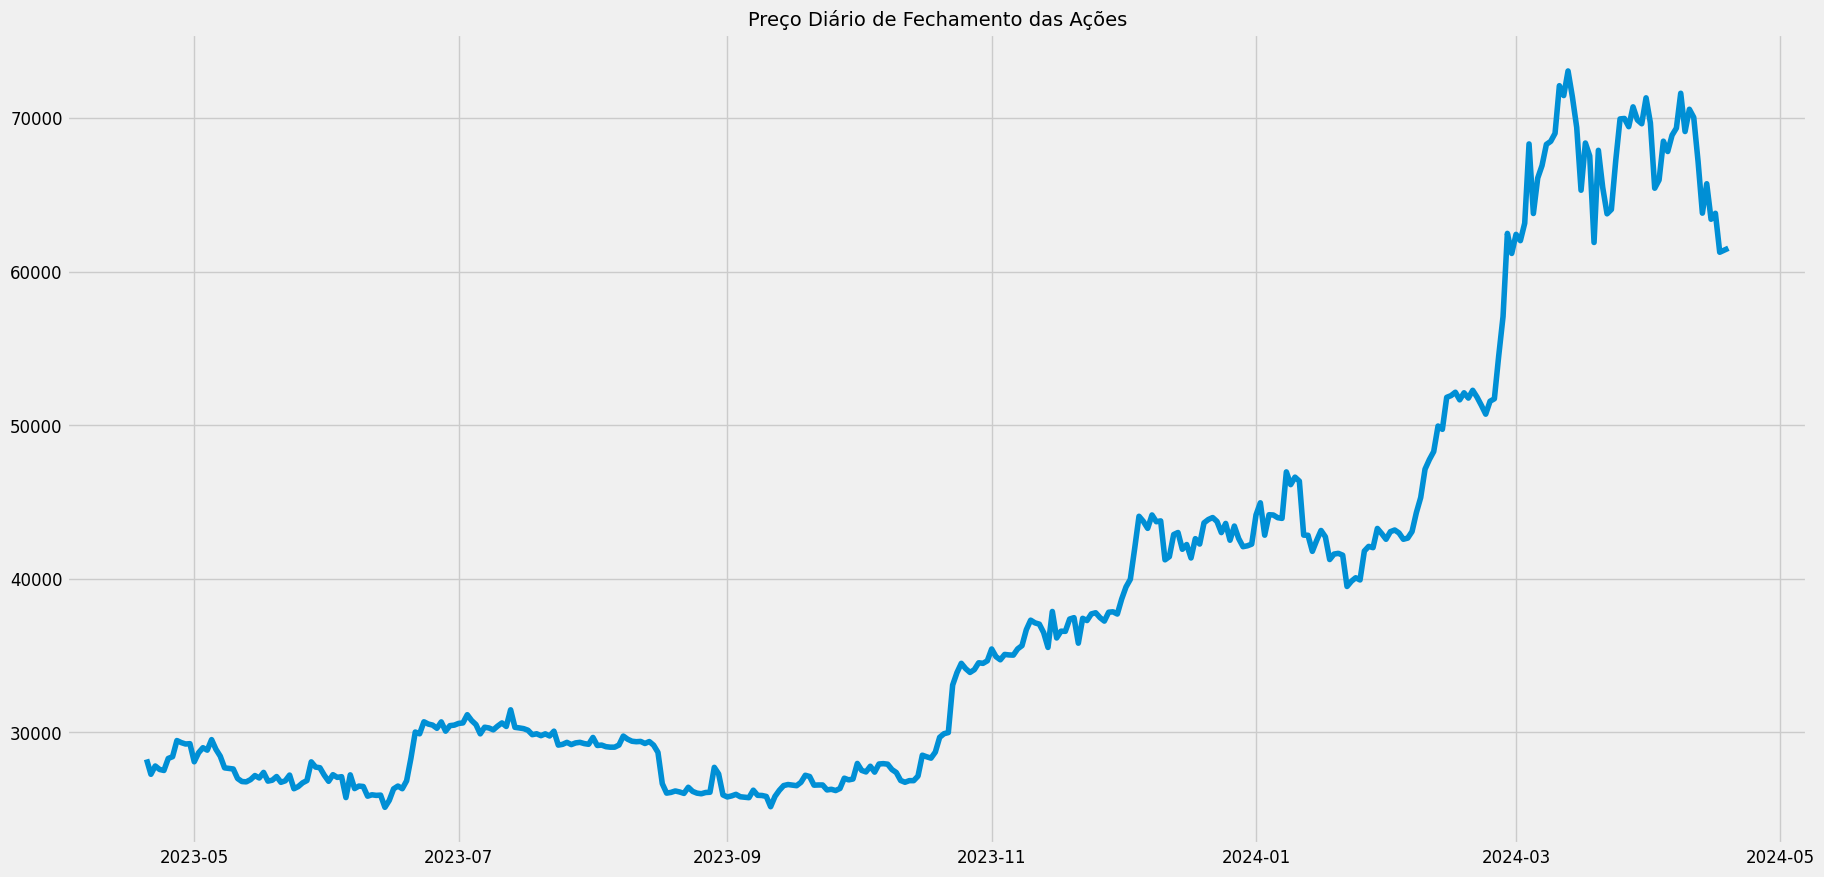

In [ ]:
# Plot
plt.plot(dados["Fechamento"])
plt.title("Preço Diário de Fechamento das Ações", size = 14)
plt.show()

In [ ]:
# Retorno acumulado
retorno_diario_acumulado = (1 + retorno_diario).cumprod() - 1
retorno_diario_acumulado.max()

1.5356247507998138

### Análise Exploratória e Estatística Descritiva

Vamos usar a estatística para calcular o retorno médio e a variação (desvio padrão).

In [ ]:
# Média do fechamento diário da cotação das ações
media_retorno_diario = np.mean(retorno_diario)

In [ ]:
# Desvio padrão do fechamento diário da cotação das ações
desvio_retorno_diario = np.std(retorno_diario)

In [ ]:
# Média e desvio padrão
print("Média do Retorno de Fechamento:", media_retorno_diario)
print("Desvio Padrão do Retorno de Fechamento:", desvio_retorno_diario)

Média do Retorno de Fechamento: 0.00237326413956066
Desvio Padrão do Retorno de Fechamento: 0.024288730160988863


Vamos considerar o ano com 364 dias de funcionamento por ser um criptoativo. Caso seja uma ação normal, devemos considerar somente 252 dias do ano, pois a operação de ações ocorre somente de segunda a sexta

In [ ]:
# Média e desvio padrão no ano (considerando 364 dias de operações)
print("Retorno Médio Anualizado de Fechamento:", (1 + media_retorno_diario) ** 364 - 1)
print("Desvio Padrão Anualizado de Fechamento:", desvio_retorno_diario*np.sqrt(364))

Retorno Médio Anualizado de Fechamento: 1.3698926817275567
Desvio Padrão Anualizado de Fechamento: 0.4633994370641079


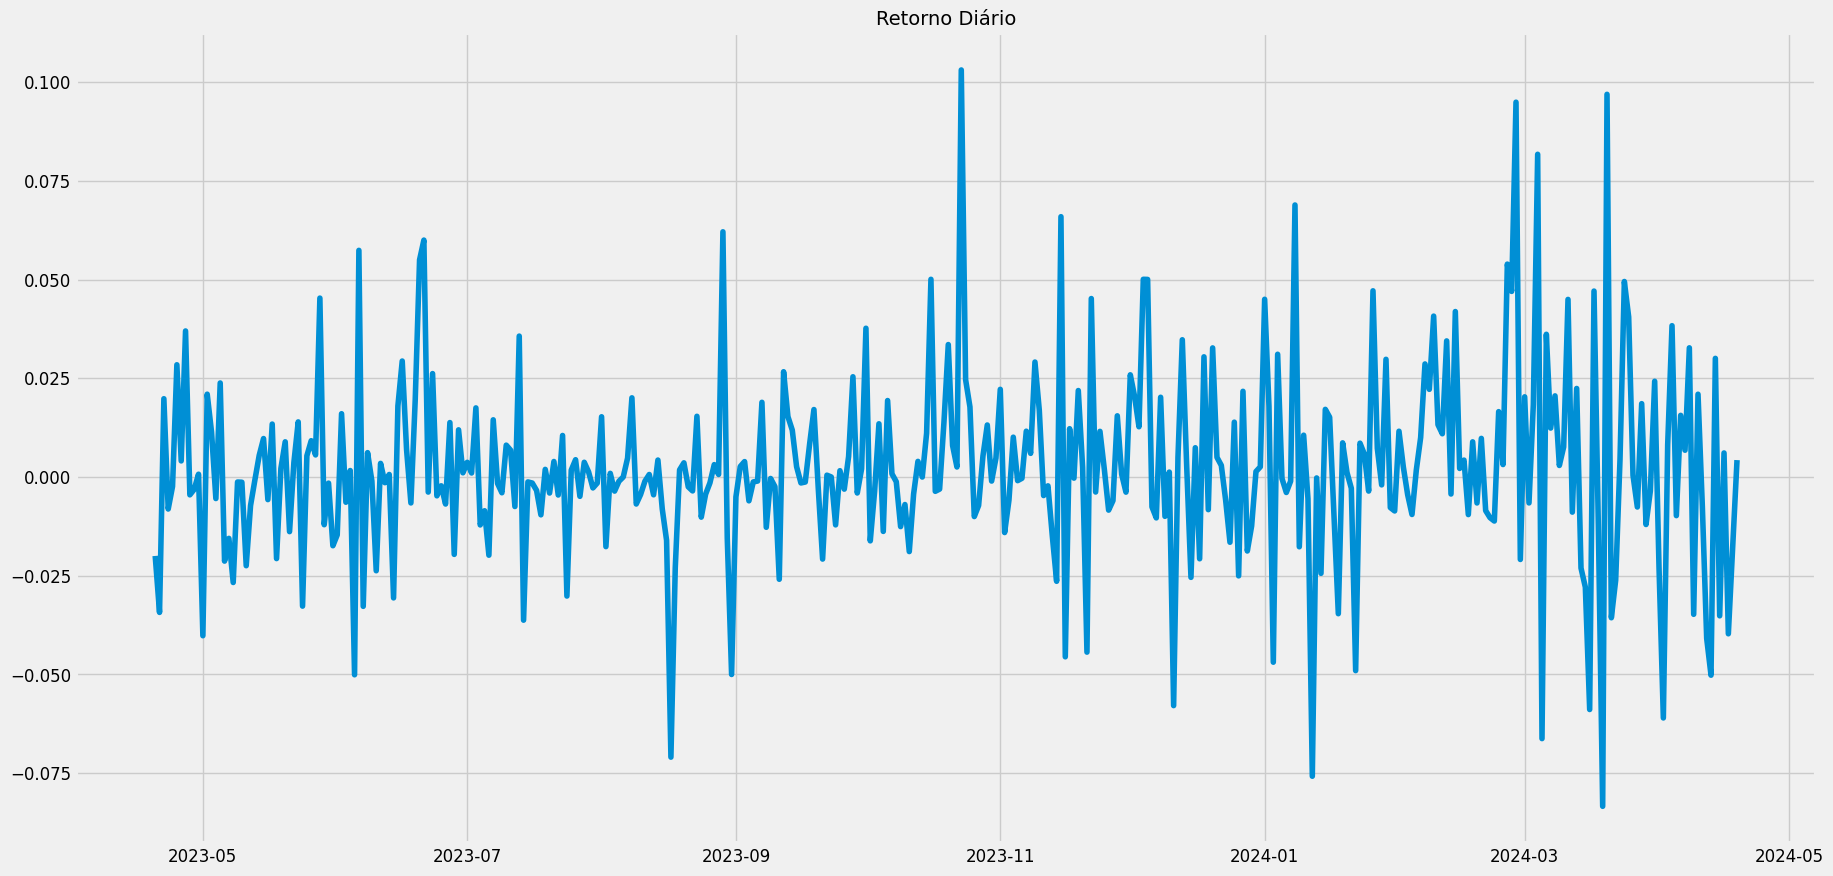

In [ ]:
# Plot
plt.plot(retorno_diario)
plt.title("Retorno Diário", size = 14)
plt.show()

Com apenas quatro grandes variações, o retorno diário tem sido constante ao longo do tempo. Vamos criar um histograma com a dstribuição do retorno diário.

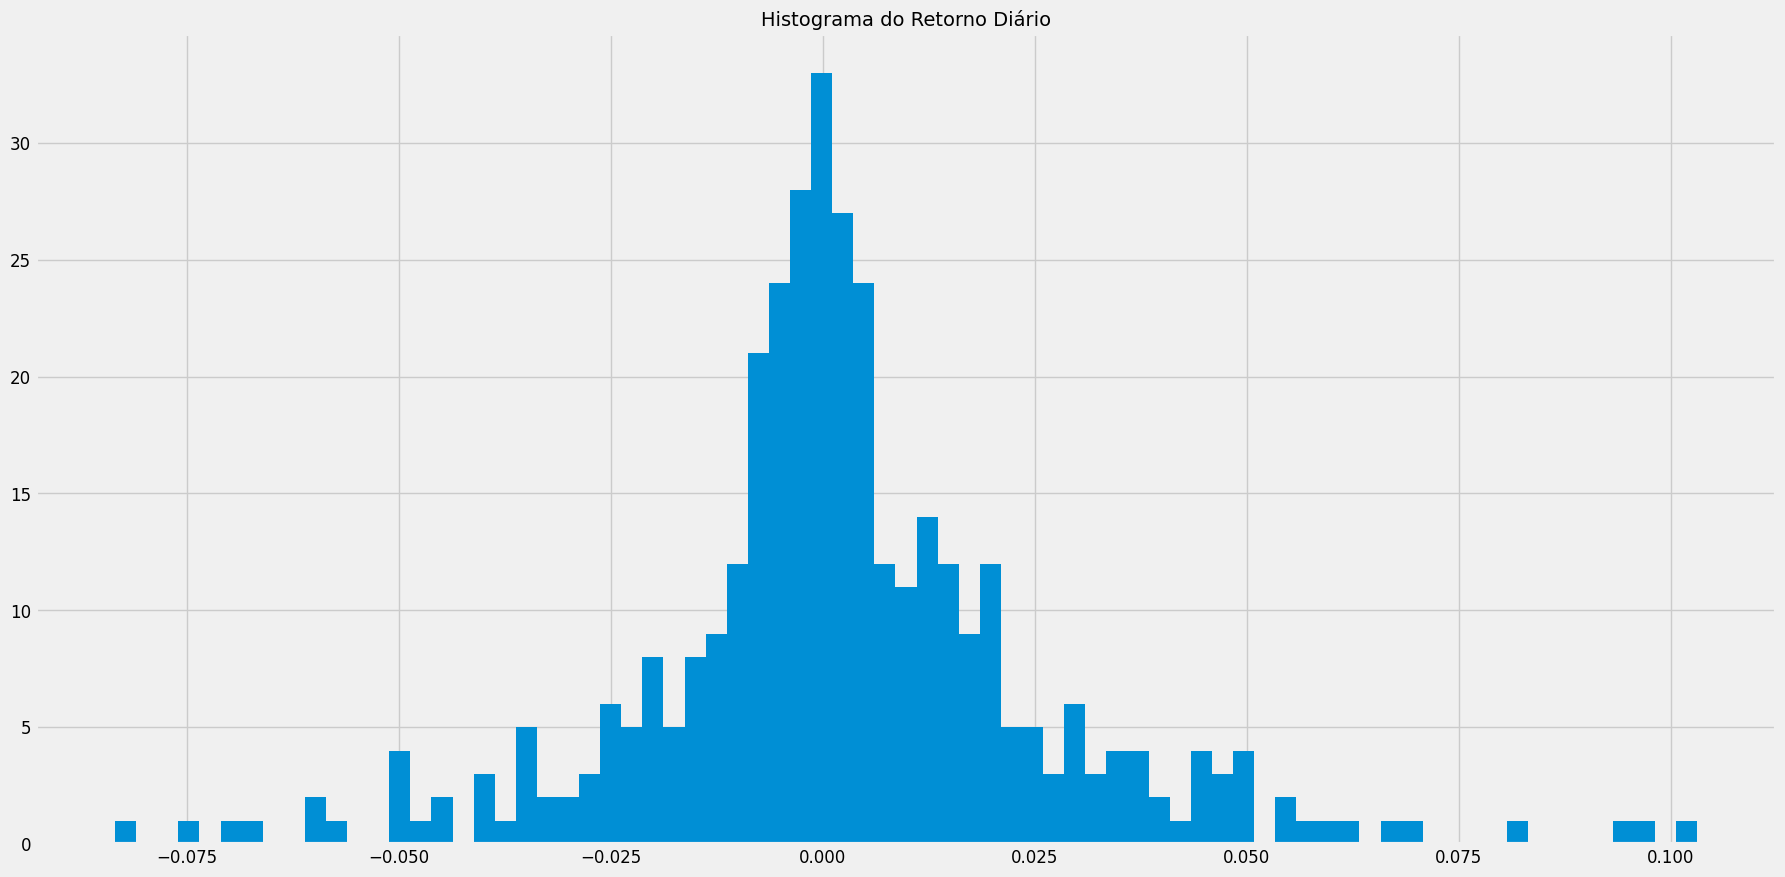

In [ ]:
# Plot
plt.hist(retorno_diario, bins = 75)
plt.title("Histograma do Retorno Diário", size = 14)
plt.show()

Os valores estão bem próximos mesmo da média.

In [ ]:
# Transformação de log e diferenciação para cálculo do retorno diário
log_retorno_diario = (np.log(dados["Fechamento"]) - np.log(dados["Fechamento"]).shift(-1)).dropna()

# Calculamos média e desvio padrão após a transformação
log_media_retorno_diario = np.mean(log_retorno_diario)
log_desvio_retorno_diario = np.std(log_retorno_diario)

Vamos criar um plot com o retorno diário da série transformada.

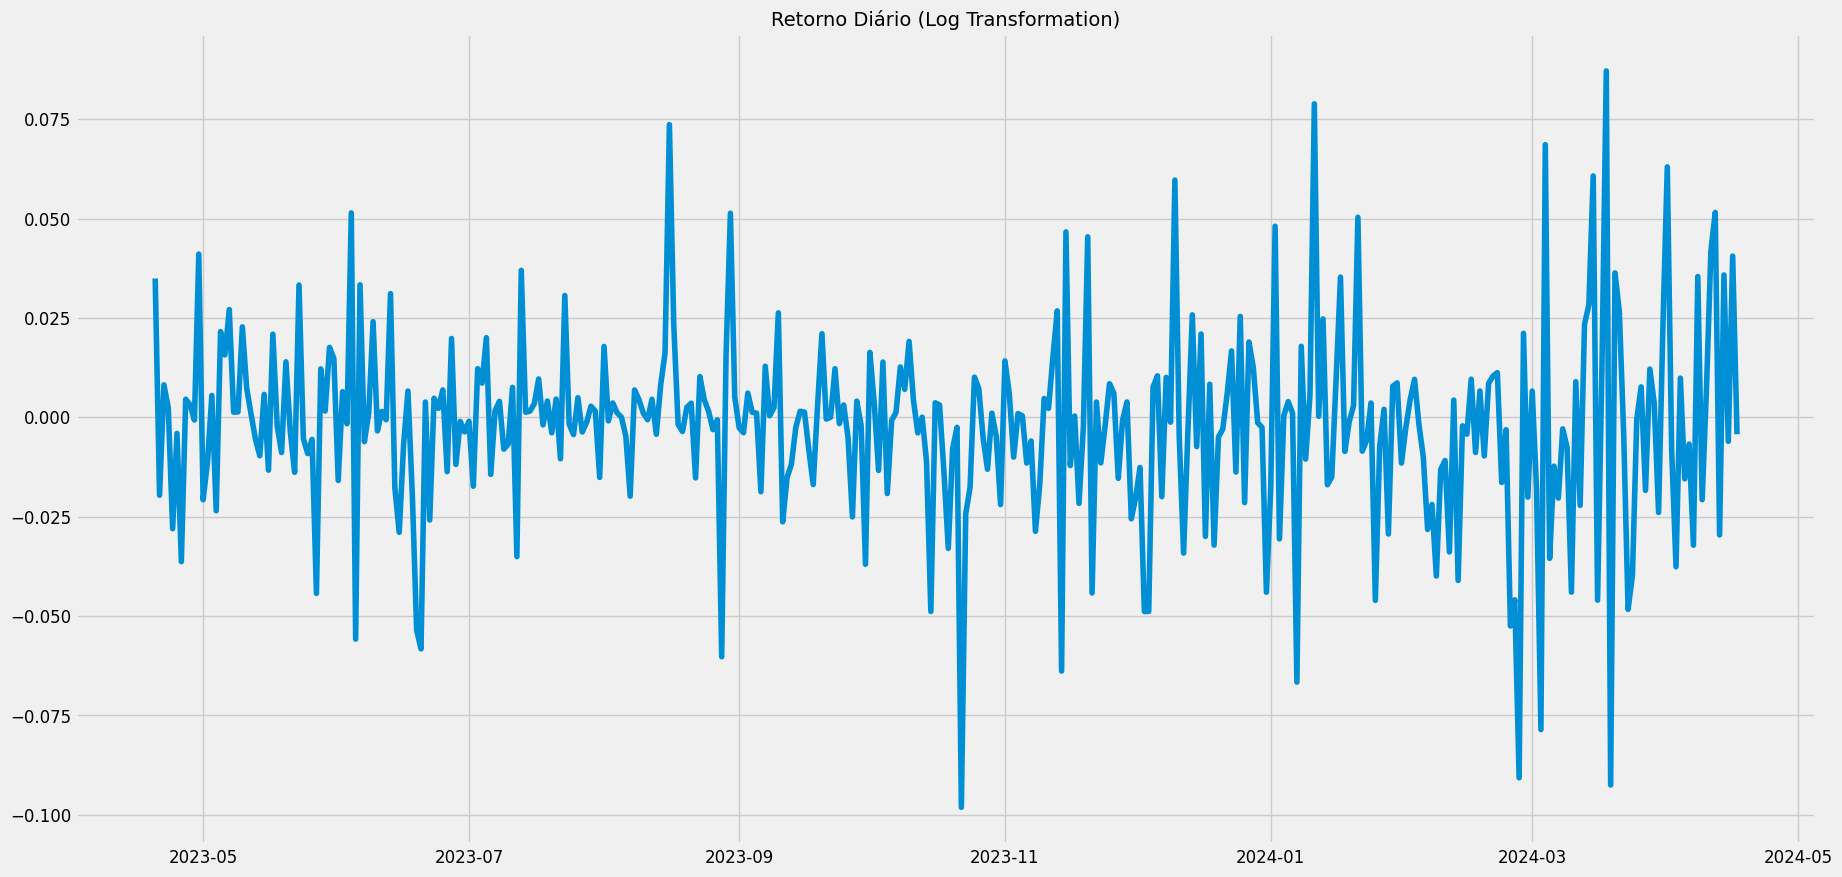

In [ ]:
# Plot
plt.plot(log_retorno_diario)
plt.title("Retorno Diário (Log Transformation)", size = 14)
plt.show()

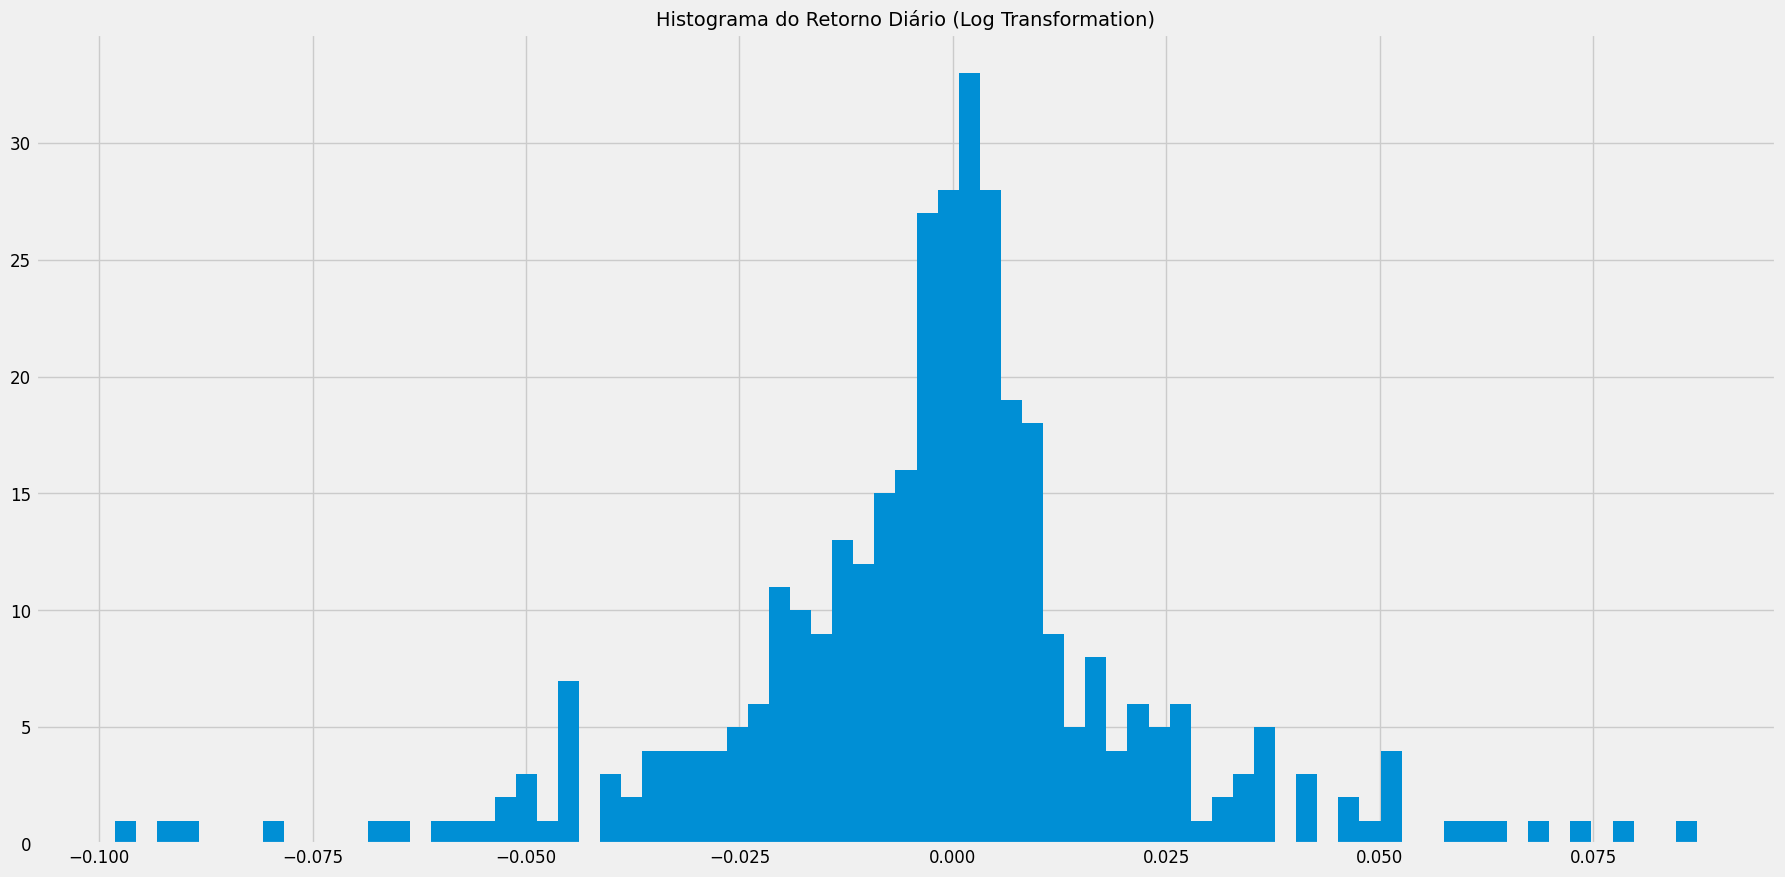

In [ ]:
# Plot
plt.hist(log_retorno_diario, bins = 75)
plt.title("Histograma do Retorno Diário (Log Transformation)", size = 14)
plt.show()

### Valor Histórico

Vamos calcular o valor histórico do preço da ação.

In [ ]:
# Nível de variância
var_level = 95
var = np.percentile(log_retorno_diario, 100 - var_level)
print("Certeza de que as perdas diárias não excederão o VaR% em um determinado dia com base em valores históricos.")
print("VAR 95%:", var)

Certeza de que as perdas diárias não excederão o VaR% em um determinado dia com base em valores históricos.
VAR 95%: -0.04429328321073589


In [ ]:
# Var para os próximos 5 dias
var * np.sqrt(5)

-0.0990427922058556

### Valor Histórico Condicional

In [ ]:
# Nível de variância
var_level = 95
var = np.percentile(log_retorno_diario, 100 - var_level)
cvar = log_retorno_diario[log_retorno_diario < var].mean()
print("Nos piores 5% dos casos, as perdas foram, em média, superiores ao percentual histórico.")
print("CVaR 95%:", cvar)

Nos piores 5% dos casos, as perdas foram, em média, superiores ao percentual histórico.
CVaR 95%: -0.060418096238603544


### Monte Carlo simulation

In [ ]:
# Simulação de Monte Carlo

# Número de dias a frente
dias_posteriores = 180

# Número de simulações
simulacoes = 2500

# Último valor da ação
ultimo_preco = 22307.00

# Cria um array vazio com as dimensões
results = np.empty((simulacoes, dias_posteriores))

# Loop por cada simulação
for s in range(simulacoes):

    # Calcula o retorno com dados randômicos seguindo uma distribuição normal
    random_returns = 1 + np.random.normal(loc = log_media_retorno_diario,
                                          scale = log_desvio_retorno_diario,
                                          size = dias_posteriores)

    result = ultimo_preco * (random_returns.cumprod())

    results[s, :] = result

In [ ]:
# Definindo o índice da série simulada
index = pd.date_range("2022-09-13", periods = dias_posteriores, freq = "D")
resultados = pd.DataFrame(results.T, index = index)
media_resultados = resultados.apply("mean", axis = 1)

## Resultado da Simulação de Monte Carlo

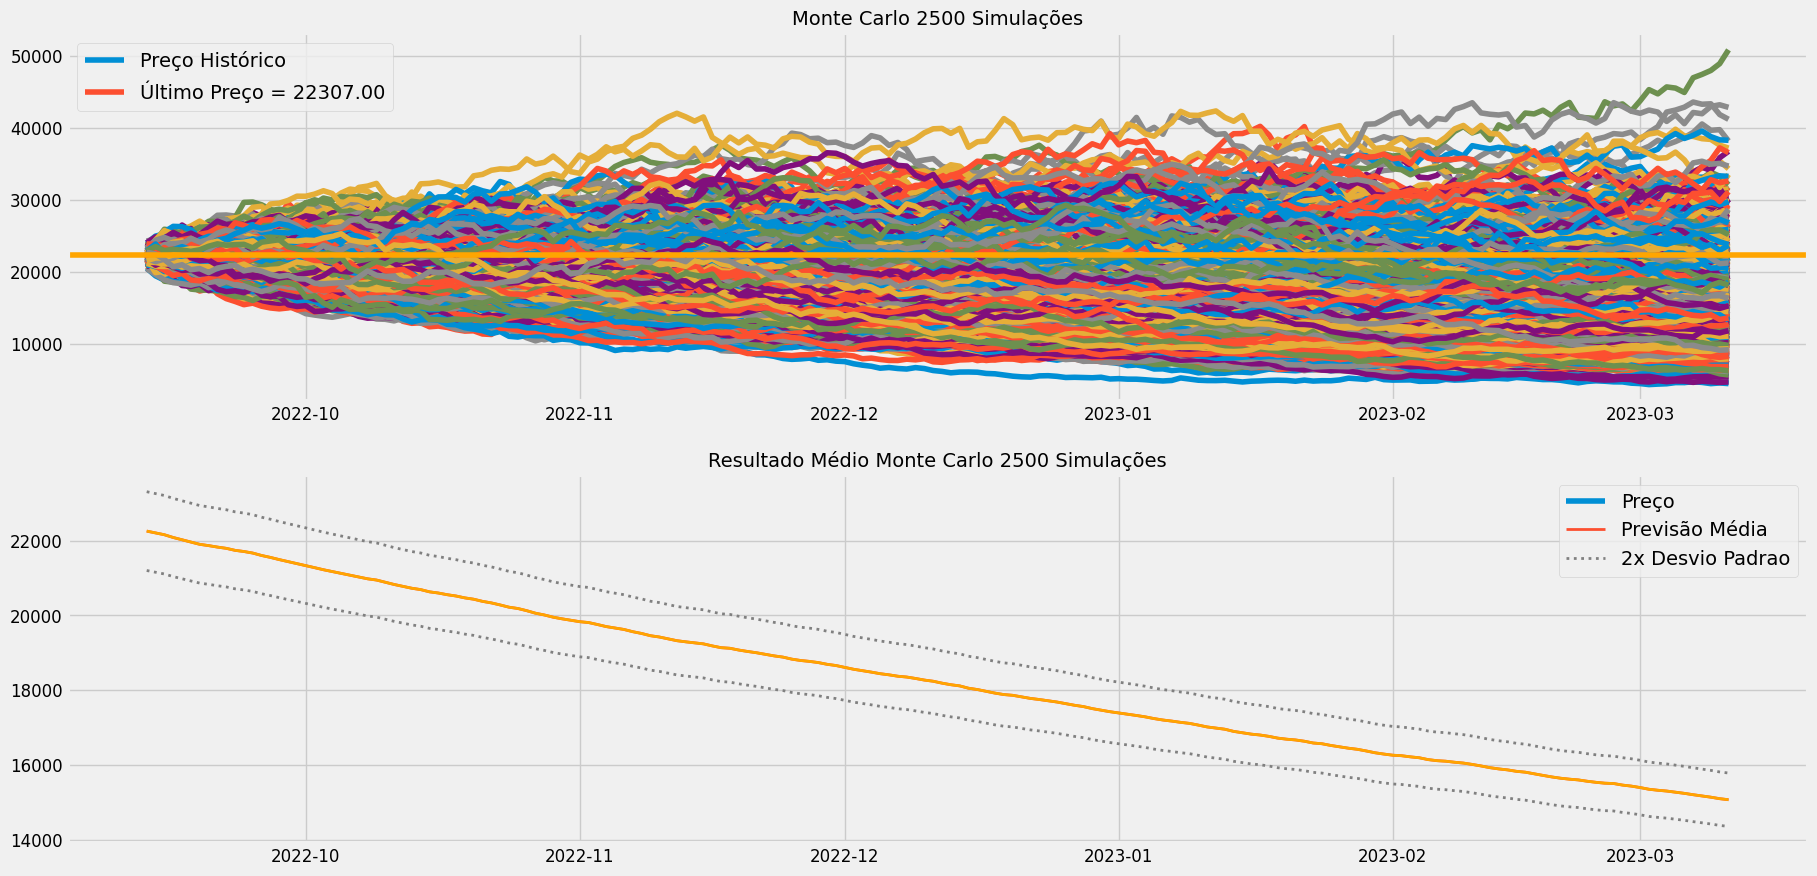

In [ ]:
# Dividindo a área de plotagem em 2 subplots
fig, ax = plt.subplots(nrows = 2, ncols = 1)

# Plot
ax[0].plot(dados["Fechamento"][:"2023-03-31"])

ax[0].plot(resultados)

ax[0].axhline(22307.00, c = "orange")

ax[0].set_title(f"Monte Carlo {simulacoes} Simulações", size = 14)

ax[0].legend(["Preço Histórico", "Último Preço = 22307.00"])

ax[1].plot(dados["Fechamento"][:"2023-03-31"])

ax[1].plot(resultados.apply("mean", axis = 1), lw = 2)

ax[1].plot(media_resultados.apply((lambda x: x * (1+1.96 * log_desvio_retorno_diario))),
           lw = 2, linestyle = "dotted", c = "gray")

ax[1].plot(media_resultados, lw = 2, c = "orange")

ax[1].plot(media_resultados.apply((lambda x: x * (1-1.96 * log_desvio_retorno_diario))),
           lw = 2, linestyle = "dotted", c = "gray")

ax[1].set_title(f"Resultado Médio Monte Carlo {simulacoes} Simulações", size = 14)

ax[1].legend(["Preço", "Previsão Média", "2x Desvio Padrao"])

plt.show()

**Transformação de log para escala original?**